**2023 Postsecondary Info--College**

*The data given shows current seniors who have decided to attend college--as of November 30, 2022. The goal is to show how many students have completed all information and what information is remaining.*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
collegeDF = pd.read_csv('/content/gdrive/MyDrive/DataAnalyticsPractice/PostsecondaryPlansClassof2023CollegeResponses.csv')

In [ ]:
collegeDF.sample(10)

,"Student Name (first, last)","Future Goals- College, Military, Workforce?","If college, have you applied to any colleges? If so, what colleges",Have you been accepted to any colleges?,If you have applied to colleges what is your major?,Have you completed FAFSA?,Have you completed any scholarships
108,Macey Russell,College,"Florida State, Western Kentucky, Brescia Unive...",Accepted to all,Education-Elementary,Yes,Yes
113,Anthony Kirk,College,NaN,NaN,NaN,NaN,NaN
1,Alecia Glenn,Military,WKU,No,General Science Technology,No,NaN
96,Isaiah Andrews,College,"WKU, University of Kentucky",WKU,Business,Yes,Yes
23,Colton Edwards,College,WKU,yes,Real Estate,No,NaN
40,Jaylan Pearson,College,"WKU, Lindsey Wilson, EKU",no,Criminology,No,NaN
82,Tucker Turner,College,SKYCTC,No,Industrial Maintenance,No,NaN
22,Christopher Arita,College,Currently applying,"SKYCTC, WKU",Electrical Engineer,No,No
51,Luke Cummins,College,WKU,No,Business,No,NaN
25,DraTavyn Barber,College,"SKYCTC, Kentucky Christian, Georgetown",No,Sports Marketing,No,NaN


In [ ]:
print(collegeDF.columns)

Index(['Student Name (first, last)',
       'Future Goals- College, Military, Workforce?',
       'If college, have you applied to any colleges? If so, what colleges',
       'Have you been accepted to any colleges?',
       'If you have applied to colleges what is your major?',
       'Have you completed FAFSA?', 'Have you completed any scholarships'],
      dtype='object')


In [ ]:
collegeDF.rename(columns={'Student Name (first, last)': 'Name', 'Future Goals- College, Military, Workforce?': 'Goals', 'If college, have you applied to any colleges? If so, what colleges': 'CollegeNames', 'Have you been accepted to any colleges?': 'Accepted', 'Have you completed FAFSA?': 'FAFSACompletion', 'Have you completed any scholarships': 'Scholarships'}, inplace=True)

In [ ]:
collegeDF['Accepted'] = collegeDF['Accepted'].apply(lambda x: 1 if x=="Yes" else 0)
collegeDF['FAFSACompletion'] = collegeDF['FAFSACompletion'].apply(lambda x: 1 if x=="Yes" else 0)
collegeDF['Scholarships'] = collegeDF['Scholarships'].apply(lambda x: 1 if x=="Yes" else 0)

In [ ]:
collegeDF.sample(15)

,Name,Goals,CollegeNames,Accepted,If you have applied to colleges what is your major?,FAFSACompletion,Scholarships
108,Macey Russell,College,"Florida State, Western Kentucky, Brescia Unive...",0,Education-Elementary,1,1
59,Megan Scoggins,College,WKU,0,Real Estate,0,0
73,Robert Cherry,College,SKYCTC,0,IT or Manufacturing,0,0
85,Abby Potts,College,"WKU, OSU",0,Agriculture,1,0
30,Gage Elkins,College,"WKU, SKYCTC",0,Business,0,0
55,Mario Phannachay,College,WKU,1,Undecided,0,0
48,Lea Sumner,College,SKYCTC,1,Dental Hygiene,0,0
84,Wyatt Nesbitt,College,SKYCTC,1,Welding,0,0
102,Kaiser Stunson,College,"WKU, U of L, TSU",0,Music,1,0
88,Autumn Henderson,College,Cosmetology,0,Cosmetology,1,0


In [ ]:
collegeDF.describe()

,Accepted,FAFSACompletion,Scholarships
count,119.000000,119.000000,119.000000
mean,0.252101,0.235294,0.134454
std,0.436055,0.425976,0.342582
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.500000,0.000000,0.000000
max,1.000000,1.000000,1.000000


In [ ]:
acceptance_rate = collegeDF.Accepted.groupby(collegeDF.Accepted).count()
FAFSA_count = collegeDF.FAFSACompletion.groupby(collegeDF.FAFSACompletion).count()
scholarship_count = collegeDF.Scholarships.groupby(collegeDF.Scholarships).count()

In [ ]:
scholarship_count

Scholarships
0    103
1     16
Name: Scholarships, dtype: int64

In [ ]:
FAFSA_count

FAFSACompletion
0    91
1    28
Name: FAFSACompletion, dtype: int64

In [ ]:
acceptance_rate

Accepted
0    89
1    30
Name: Accepted, dtype: int64

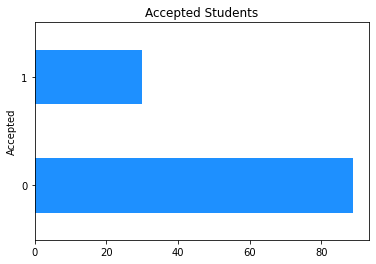

In [ ]:
acceptance_rate.plot(kind="barh", title="Accepted Students", color="dodgerblue")

*Based on this plot, the seniors have applied but not many are accepted*

Note: some entries were not "yes" or "no," therefore, those entries are marked as 0.

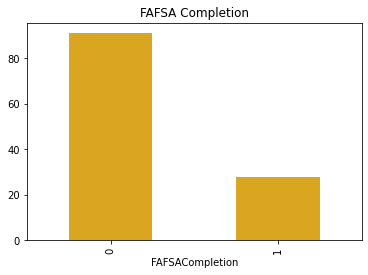

In [ ]:
FAFSA_count.plot(kind="bar", title="FAFSA Completion", color="goldenrod")

*Seniors might have applied to their colleges, but their FAFSAs have not been completed*

In [ ]:
collegeDF.rename(columns={"If you have applied to colleges what is your major?": "Major"}, inplace=True)

In [ ]:
collegeDF.Major

0                             Industrial Maintenance
1                         General Science Technology
2      Vet Science and back up major as SPED teacher
3                                        Social Work
4                                            Nursing
                           ...                      
114                             Physicians Assistant
115                           Electrical Engineering
116                                     Cosmetology 
117                                          Pre-Vet
118                                               IT
Name: Major, Length: 119, dtype: object